### Imports

In [1]:
import operator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import feature_selection
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler, RobustScaler, Imputer, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from IPython.core.pylabtools import figsize 
%matplotlib inline

### Aux Functions

### Analysis

In [3]:
varq = pd.read_csv("data/properties-varq.tab.gz", sep="\t")

In [5]:
varq.columns

Index([u'MUTANT', u'SASA', u'SASA_PERCENTAGE', u'BFACTOR', u'SWITCHBILITY',
       u'AGGREGABILITY', u'CONSERVATION', u'3DID', u'PDB', u'ACTIVE_SITE',
       u'VARIATION_ENERGY', u'TYPE'],
      dtype='object')

In [4]:
varq.AGGREGABILITY.shape

(17869,)

In [6]:
varq.AGGREGABILITY.isnull().sum()

5570

In [10]:
varq.VARIATION_ENERGY.isnull().sum()

0

In [12]:
varq.MUTANT.unique().shape

(17869,)

In [14]:
print "Size: \n", varq.shape
print "\nValue counts of TYPE: \n", varq.TYPE.value_counts()

Size: 
(17869, 12)

Value counts of TYPE: 
Benign        11763
Pathogenic     6106
Name: TYPE, dtype: int64


In [15]:
varq.describe()

,SASA,SASA_PERCENTAGE,BFACTOR,SWITCHBILITY,AGGREGABILITY,CONSERVATION,VARIATION_ENERGY
count,16798.000000,16798.000000,16798.000000,15651.000000,12299.000000,6099.000000,17869.000000
mean,36.869348,0.172637,54.651370,0.403744,4.983431,0.353983,2.250763
std,40.633632,0.181814,65.762465,0.935355,17.533670,0.359287,4.056646
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.130000,-13.530900
25%,2.187000,0.010000,19.905625,0.000000,0.000000,0.250000,0.133057
50%,22.220000,0.110000,37.853750,0.008850,0.000000,0.300000,1.134230
75%,60.210250,0.300000,62.090000,0.303500,0.131000,0.370000,3.056210
max,254.526000,0.750000,755.610000,9.720000,100.000000,11.700000,57.513400


In [17]:
corr = varq.drop(['3DID', 'PDB', 'MUTANT'], axis=1).corr()

In [18]:
corr

,SASA,SASA_PERCENTAGE,BFACTOR,SWITCHBILITY,AGGREGABILITY,CONSERVATION,VARIATION_ENERGY
SASA,1.000000,0.962449,0.060265,-0.042781,-0.017759,0.008619,-0.306423
SASA_PERCENTAGE,0.962449,1.000000,0.091254,-0.050652,-0.014159,0.015112,-0.329032
BFACTOR,0.060265,0.091254,1.000000,0.051770,0.106277,-0.030563,-0.067454
SWITCHBILITY,-0.042781,-0.050652,0.051770,1.000000,0.047975,-0.002319,-0.014635
AGGREGABILITY,-0.017759,-0.014159,0.106277,0.047975,1.000000,0.001127,-0.003761
CONSERVATION,0.008619,0.015112,-0.030563,-0.002319,0.001127,1.000000,0.027866
VARIATION_ENERGY,-0.306423,-0.329032,-0.067454,-0.014635,-0.003761,0.027866,1.000000


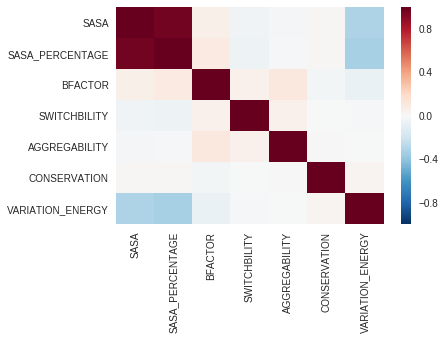

In [19]:
plot = sns.heatmap(corr)
figure = plot.get_figure()

In [24]:
varq['UNIPROT'] = varq.MUTANT.str.split("-").apply(lambda x: x[0])

In [37]:
grouped_varq_describe = varq.groupby(varq['UNIPROT']).describe()

In [41]:
grouped_varq_type = varq.groupby(varq['UNIPROT']).TYPE.value_counts(normalize=True)

In [54]:
grouped_varq_type.unstack().replace({'Pathogenic': {np.nan: 0}})['Pathogenic'].sort_values(ascending=False)

UNIPROT
O60216    1.0
Q15436    1.0
O15119    1.0
P07237    1.0
P07738    1.0
Q13835    1.0
P08842    1.0
P40259    1.0
Q14623    1.0
Q14807    1.0
Q92979    1.0
Q92859    1.0
P11277    1.0
O15520    1.0
Q9UJV9    1.0
P13929    1.0
P32929    1.0
P46976    1.0
O14746    1.0
Q9Y243    1.0
Q8TD30    1.0
Q15910    1.0
Q9Y223    1.0
Q8TCG5    1.0
Q8NI22    1.0
P15104    1.0
P15882    1.0
Q5TBB1    1.0
Q63ZY3    1.0
Q8IWV7    1.0
         ... 
Q86US8    0.0
Q86UT6    0.0
Q86UY6    0.0
Q86VN1    0.0
Q86VP6    0.0
Q7L804    0.0
Q7L266    0.0
Q71SY5    0.0
Q6UWW0    0.0
Q6NZ36    0.0
Q6P3W2    0.0
Q6P587    0.0
Q6P6C2    0.0
Q6P988    0.0
Q6PIF6    0.0
Q6PJP8    0.0
Q6UVW9    0.0
Q6UWV6    0.0
Q6UWY2    0.0
Q6ZW49    0.0
Q6UWZ7    0.0
Q6UXN8    0.0
Q6W2J9    0.0
Q6XQN6    0.0
Q6ZMJ4    0.0
Q6ZNL6    0.0
Q6ZRY4    0.0
Q6ZSG1    0.0
Q6ZT98    0.0
A1Z1Q3    0.0
Name: Pathogenic, dtype: float64

In [ ]:
grouped_varq_type.unstack().replace({'Pathogenic': {np.nan: 0}})['Pathogenic'].sort_values

In [ ]:
grouped_varq_type.unstack().replace({'Pathogenic': {np.nan: 0}}).Pathogenic.sort_values

In [ ]:
grouped_varq_type.unstack().replace({'Pathogenic': {np.nan: 0}}).Pathogenic.sort_values

### Feature Selection

In [3]:
feature_selection.SelectKBest?

In [80]:
model_dict = {
    'lr':{'pipe':('lr', LogisticRegression()),
        'params':[{'lr__C' : [.001, .01, .1, 1, 10, 100, 1000], 'lr__class_weight':[None, 'balanced']}],
        'name':'LogisticRegression'
       },
    'rf':{'pipe':('rf', RandomForestClassifier(random_state = 100)),
        'params':[{'rf__max_depth':[3,5,7], 'rf__n_estimators':[10,50,100], 'rf__max_features':[4,'sqrt',0.2]}],
        'name':'Random Forest'
       },
}

#### Random Forest

In [161]:
algorithm = 'rf'
model = Pipeline([('imputer', Imputer(missing_values="NaN", strategy="median")), ('scale', RobustScaler()),
                  model_dict[algorithm]['pipe']])
param_list = [model_dict[algorithm]['params']][0]
gs = GridSearchCV(model, param_list, cv=3, n_jobs=2, scoring='roc_auc', verbose=1, refit=True)
le = LabelEncoder()

In [162]:
train = varq[~varq.TYPE.isnull()]
train = train.drop(['3DID', 'PDB'], 1).replace({"ACTIVE_SITE": {"BINDING": 1, np.nan: 0}}).set_index("MUTANT")
x_train = train.drop('TYPE',1)
y_train = le.fit_transform(train['TYPE'])

In [163]:
gs.fit(x_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.8s
[Parallel(n_jobs=2)]: Done  81 out of  81 | elapsed:   27.2s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('scale', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
     ...timators=10, n_jobs=1, oob_score=False, random_state=100,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=2,
       param_grid=[{'rf__max_depth': [3, 5, 7], 'rf__max_features': [4, 'sqrt', 0.2], 'rf__n_estimators': [10, 50, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [164]:
rf = gs.best_estimator_

In [166]:
gs.best_score_

0.6752462886207361

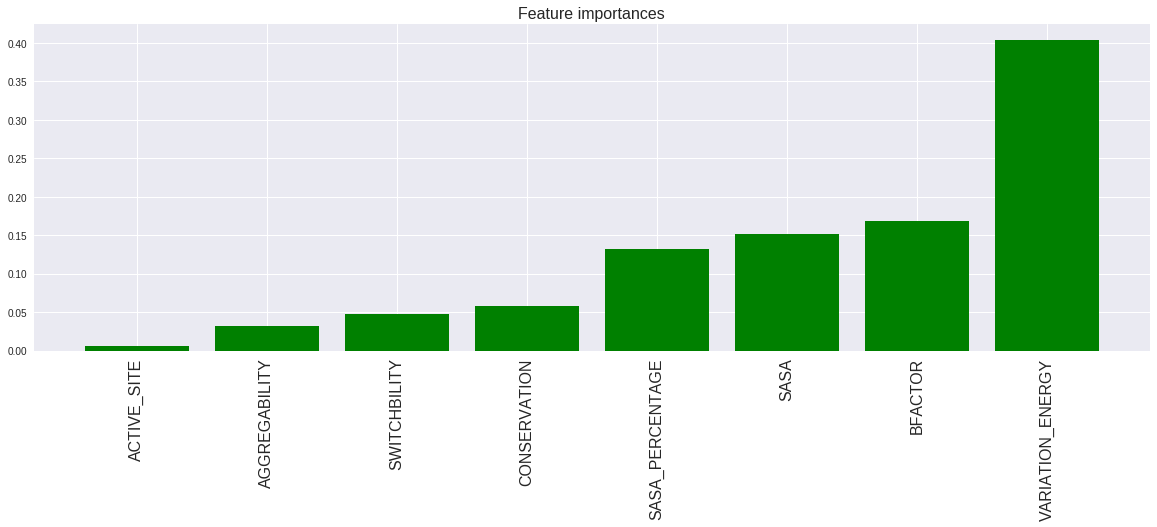

In [167]:
importances = [(x_train.columns[e], x) for e, x in enumerate(rf.steps[2][1].feature_importances_)]
importances.sort(key=operator.itemgetter(1))
figsize(20,6)
plt.title("Feature importances", fontsize=16)
plt.bar(np.arange(len(importances)), [y for x, y in importances], color="g", align="center")
plt.xticks(range(len(importances)), [x for x, y in importances], rotation='vertical', fontsize=16)
# plt.xlim([0, range(len(importances))])
plt.show()

#### Logistic Regression

In [173]:
algorithm = 'lr'
model = Pipeline([('imputer', Imputer(missing_values="NaN", strategy="median")), ('scale', RobustScaler()),
                  model_dict[algorithm]['pipe']])
param_list = [model_dict[algorithm]['params']][0]
gs = GridSearchCV(model, param_list, cv=3, n_jobs=2, scoring='roc_auc', verbose=1, refit=True)
le = LabelEncoder()

In [174]:
gs.fit(x_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=2)]: Done  42 out of  42 | elapsed:    3.8s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('scale', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_i...y='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=2,
       param_grid=[{'lr__class_weight': [None, 'balanced'], 'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [175]:
lr = gs.best_estimator_

In [176]:
gs.best_score_

0.64938157909589589

In [177]:
importances = zip(x_train.columns.tolist(), lr.steps[2][1].coef_[0].tolist())

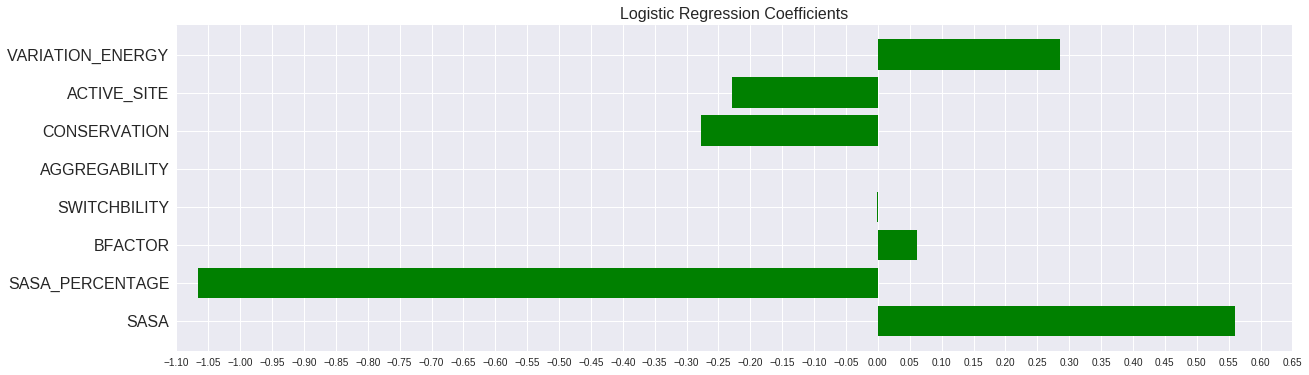

In [186]:
figsize(20,6)
plt.title("Logistic Regression Coefficients", fontsize=16)
plt.barh(np.arange(len(importances)), [y for x, y in importances], color="g", align="center")
plt.yticks(range(len(importances)), [x for x, y in importances], rotation='horizontal', fontsize=16)
plt.xticks(np.arange(-1.1,.7,.05))
plt.show()